[학습목표]<br>
히트맵을 이용하여 색으로 값의 크기를 표현하여 비교할 수 있다.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 히트맵
* plt.pcolor(2차원데이터)
* 컬러맵의 종류<br>
https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html<br>

In [2]:
# 샘플데이터
import numpy as np
arr = np.random.standard_normal((5,5))
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,1.012748,0.305475,-0.442657,0.785549,0.837770
1,-1.073110,0.007205,1.023829,0.279823,0.007128
2,0.273732,-0.634075,-1.002710,1.083802,-0.018539
3,-1.739432,0.448049,-0.569667,-0.164136,0.768798
4,0.892929,-0.695308,-1.634577,1.221600,-0.209931


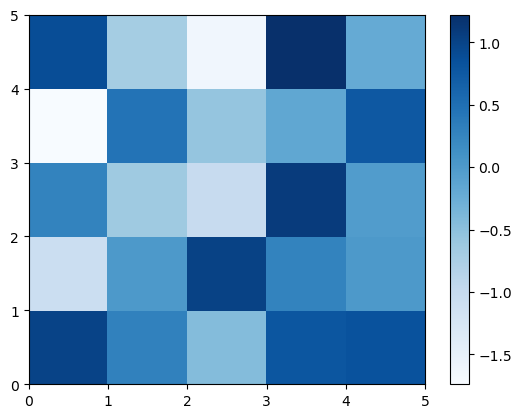

In [6]:
# 히트맵 그리기

plt.pcolor(df, cmap='Blues')
plt.colorbar()
plt.show()

# 히트맵 예제
* 타이나틱호의 연령대_객실등급별 승선자수

## 데이터 준비

In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
titanic.shape

(891, 15)

## 데이터 전처리 

### 결측치 처리

In [9]:
# 결측치 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# 컬럼 삭제
titanic = titanic.drop(columns=['deck'])

In [5]:
# 결측치 삭제
titanic = titanic.dropna()

In [6]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
titanic.shape

(712, 14)

### 연령대 컬럼 생성

In [7]:
titanic['agerange'] = (titanic['age']/10).astype(int) * 10  # 실수형을 정수로 바꾸고 x10

In [8]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agerange
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,20
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,30
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,10
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20


### 피벗테이블 : 연령대-객실등급 별 승선자 수

In [9]:
ti_pivot = titanic.pivot_table(index='class', columns='agerange', values='survived', aggfunc='count')

In [10]:
ti_pivot

agerange,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


## 히트맵

### matplotlib

In [12]:
import numpy as np

range(0,len(ti_pivot.columns),1)

range(0, 9)

In [13]:
np.arange(0,len(ti_pivot.columns),1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

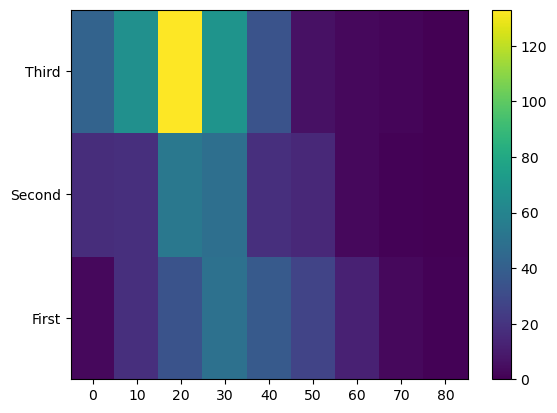

In [36]:
plt.pcolor(ti_pivot)
plt.colorbar()

plt.xticks(np.arange(0.5,len(ti_pivot.columns),1), labels=ti_pivot.columns)
plt.yticks(np.arange(0.5,len(ti_pivot.index),1), labels=ti_pivot.index)
plt.show()

### seaborn
* heatmap(data=2차원데이터)<br>
cmap=컬러맵 : 컬러맵 지정<br>
annot=True : 수치 표시<br>
fmt='d' : 정수로 표시<br>

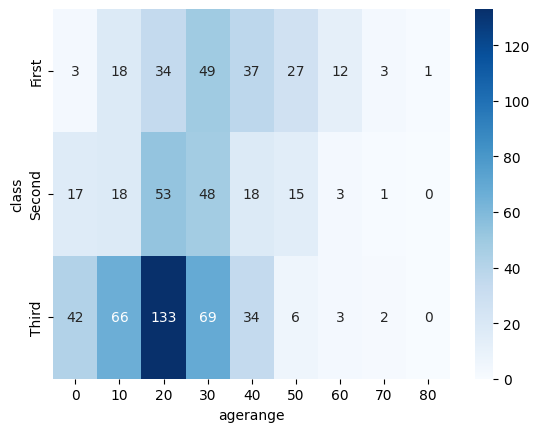

In [14]:
sns.heatmap(ti_pivot, cmap='Blues', annot=True, fmt='d')

plt.show()